In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import  pandas as pd
from sklearn.cluster import KMeans, DBSCAN, kmeans_plusplus

In [34]:
#open the data file
df = pd.read_json('electronics.json')
df.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


In [35]:
df.replace('', np.nan).isna().sum()

Customer_ID                      32
Age                              33
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    35
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  33
Average_Spending_Per_Purchase    26
Purchase_Frequency_Per_Month     37
Brand_Affinity_Score             47
Product_Category_Preferences     31
Month                            40
Year                             39
Season                           36
dtype: int64

In [36]:
df.replace('Hidden', np.nan).isna().sum()

Customer_ID                      12
Age                               7
Gender                           15
Income_Level                      9
Address                          15
Transaction_ID                   11
Purchase_Date                    13
Product_ID                        9
Product_Category                 16
Brand                            12
Purchase_Amount                  16
Average_Spending_Per_Purchase    14
Purchase_Frequency_Per_Month     18
Brand_Affinity_Score             14
Product_Category_Preferences     12
Month                            13
Year                             13
Season                           12
dtype: int64

In [37]:
df.replace('', np.nan, inplace=True)
df.replace('Hidden', np.nan, inplace=True)

df.isna().sum()

Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64

In [38]:
#Convert column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')
df['Average_Spending_Per_Purchase'] = pd.to_numeric(df['Average_Spending_Per_Purchase'], errors='coerce')
df['Purchase_Frequency_Per_Month'] = pd.to_numeric(df['Purchase_Frequency_Per_Month'], errors='coerce')
df['Brand_Affinity_Score'] = pd.to_numeric(df['Brand_Affinity_Score'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

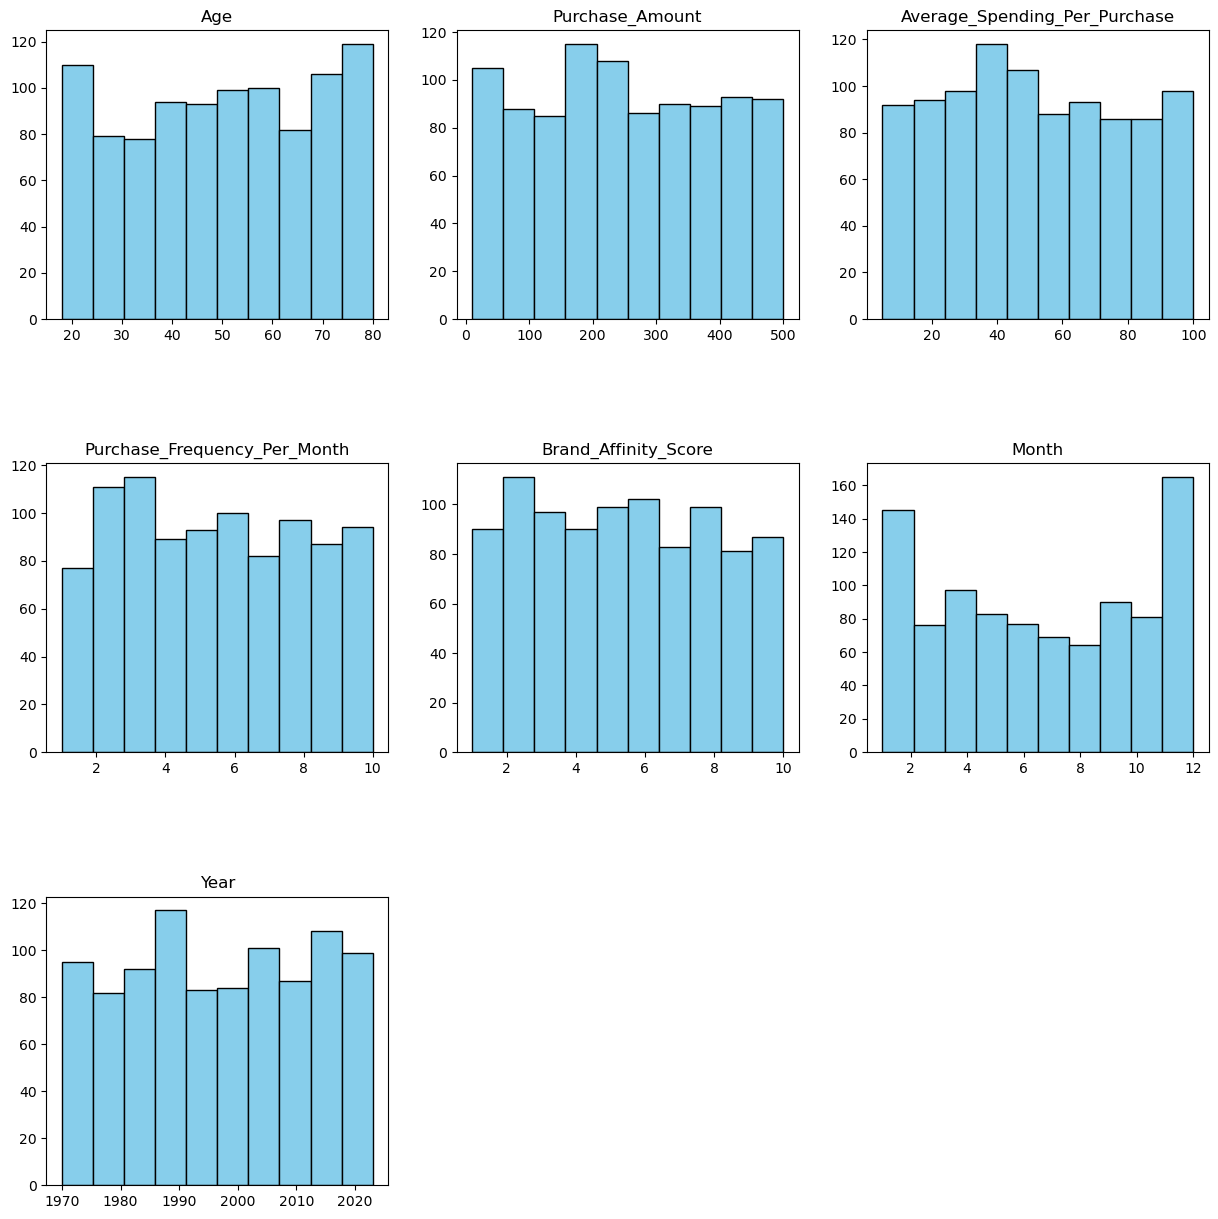

In [8]:
# Select only numeric columns
numeric_columns = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                   'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
                   'Month', 'Year']

# Create subplots with 3 columns in each row
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the 2D array of subplots to make it easier to iterate
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, column in enumerate(numeric_columns):
    df[column].plot(kind='hist', ax=axes[i], edgecolor='black', color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide empty subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.show()

In [39]:
# df.dropna(subset=['Customer_ID'], inplace=True)

df['Customer_ID'].fillna('Unknown', inplace=True)

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Income_Level'].fillna(df['Income_Level'].mode()[0], inplace=True)

df['Address'].fillna('Unknown', inplace=True)

df['Transaction_ID'].fillna('Unknown', inplace=True)

df['Purchase_Date'].fillna(method='ffill', inplace=True)

df['Product_ID'].fillna('Unknown', inplace=True)

df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

df['Brand'].fillna(df['Brand'].mode()[0], inplace=True)

df['Purchase_Amount'].fillna(df['Purchase_Amount'].median(), inplace=True)

df['Average_Spending_Per_Purchase'].fillna(df['Average_Spending_Per_Purchase'].median(), inplace=True)

df['Purchase_Frequency_Per_Month'].fillna(df['Purchase_Frequency_Per_Month'].median(), inplace=True)

df['Brand_Affinity_Score'].fillna(df['Brand_Affinity_Score'].median(), inplace=True)

df['Product_Category_Preferences'].fillna(df['Product_Category_Preferences'].mode()[0], inplace=True)

df['Month'].fillna(df['Month'].mode()[0], inplace=True)

df['Year'].fillna(df['Year'].mode()[0], inplace=True)

df['Season'].fillna(df['Season'].mode()[0], inplace=True)

df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193.0,59.0,2.0,2.0,Low,1.0,2010.0,Winter
1,Unknown,25.0,Male,High,Unknown,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318.0,77.0,2.0,1.0,Low,8.0,1989.0,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197.0,100.0,9.0,1.0,Low,4.0,1995.0,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262.0,97.0,3.0,4.0,Low,9.0,2012.0,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429.0,85.0,7.0,2.0,High,1.0,2010.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Unknown,70.0,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180.0,92.0,2.0,5.0,Medium,5.0,1987.0,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78.0,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176.0,53.0,3.0,3.0,Medium,9.0,1977.0,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63.0,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,2023-08-30,8b6ffec8-de54-445c-90d0-1399858b2e16,Electronics,Brand_C,212.0,99.0,2.0,9.0,Low,12.0,1995.0,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43.0,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,246.0,98.0,8.0,7.0,Low,3.0,2000.0,Fall


In [40]:
df.isna().sum()

Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64

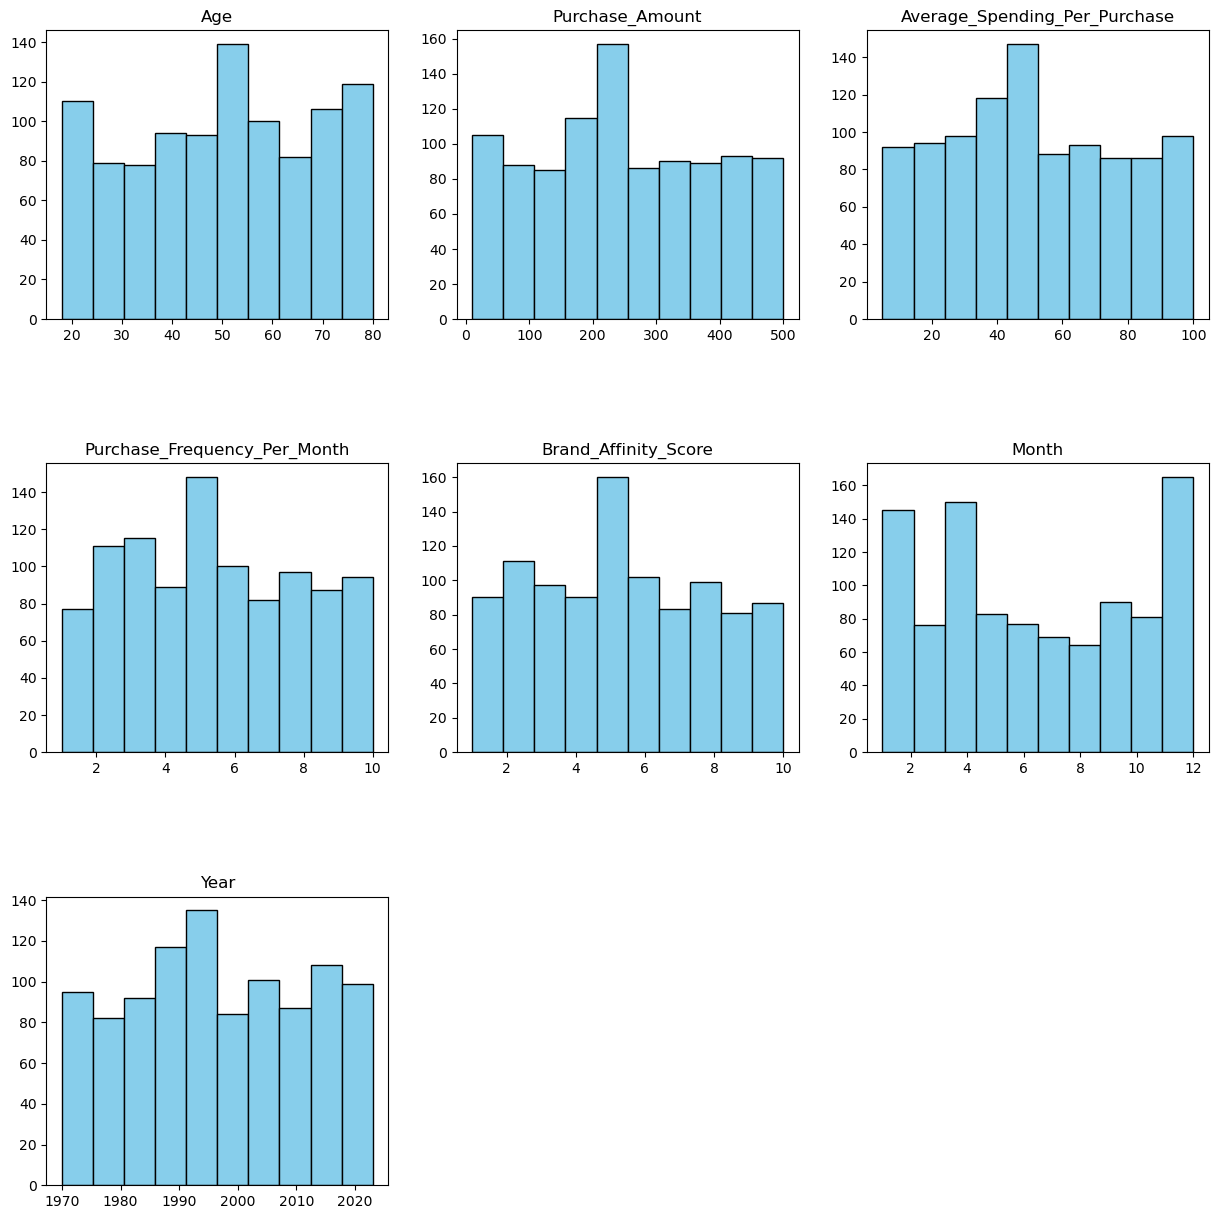

In [11]:
# Select only numeric columns
numeric_columns = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                   'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
                   'Month', 'Year']

# Create subplots with 3 columns in each row
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Flatten the 2D array of subplots to make it easier to iterate
axes = axes.flatten()

# Iterate through numeric columns and plot histograms
for i, column in enumerate(numeric_columns):
    df[column].plot(kind='hist', ax=axes[i], edgecolor='black', color='skyblue')
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide empty subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

plt.show()


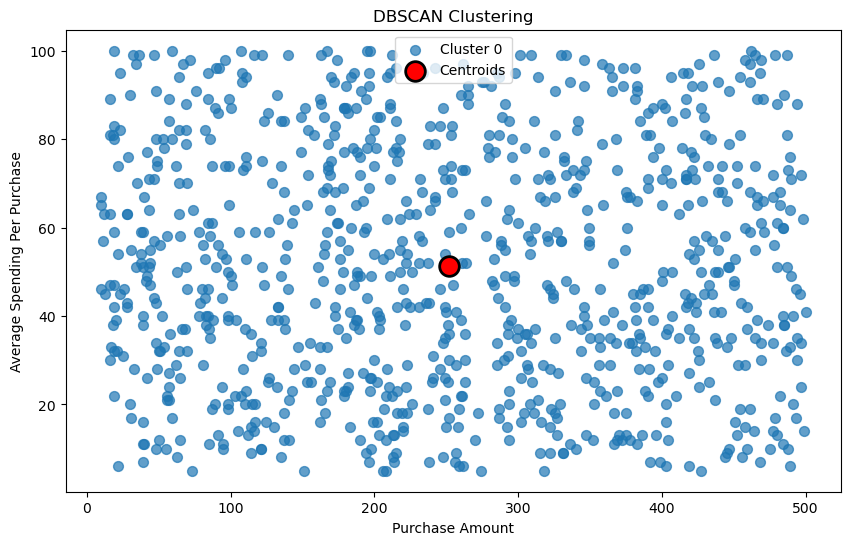

In [31]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant columns for clustering
columns_for_clustering = ['Purchase_Amount', 'Average_Spending_Per_Purchase']

# Convert selected columns to float, handling missing values
df[columns_for_clustering] = df[columns_for_clustering].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(subset=columns_for_clustering, inplace=True)

# Standardize the data
scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(df[columns_for_clustering])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(data_for_clustering)

# Get cluster labels
labels = df['Cluster'].unique()

# Plotting
plt.figure(figsize=(10, 6))

# Plot each cluster separately
for label in labels:
    cluster_points = df[df['Cluster'] == label]
    
    if label == -1:
        # Border points (outliers)
        plt.scatter(cluster_points['Purchase_Amount'], cluster_points['Average_Spending_Per_Purchase'],
                    c='black', label='Border Points', marker='x', s=100)
    else:
        # Core points
        plt.scatter(cluster_points['Purchase_Amount'], cluster_points['Average_Spending_Per_Purchase'],
                    label=f'Cluster {label}', s=50, alpha=0.7)

# Centroids of each cluster
centroids = df.groupby('Cluster')[columns_for_clustering].mean()
plt.scatter(centroids['Purchase_Amount'], centroids['Average_Spending_Per_Purchase'],
            marker='o', color='red', s=200, edgecolors='black', linewidths=2, label='Centroids')

plt.title('DBSCAN Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Average Spending Per Purchase')
plt.legend()
plt.show()


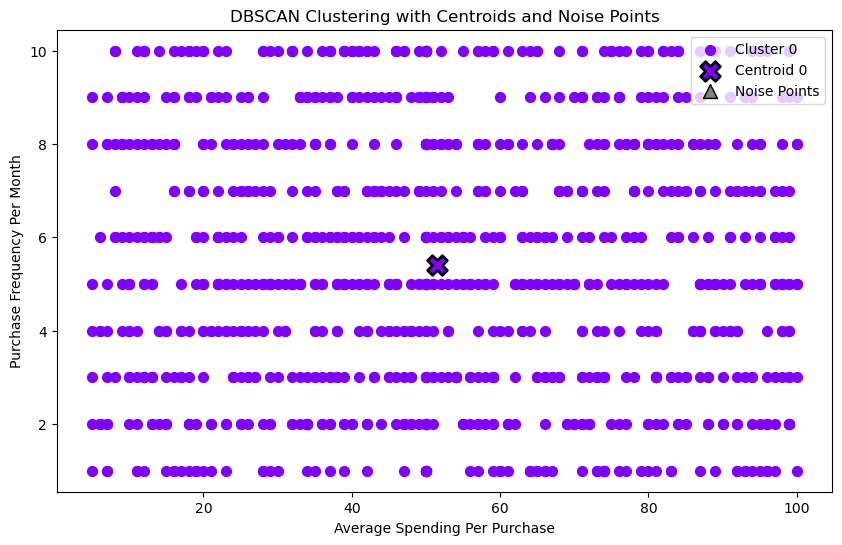

In [44]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Extract the numerical columns for clustering
numerical_columns = ['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month']
X = df[numerical_columns]

# Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster_Labels'] = labels

# Visualize the results (scatter plot for two numerical columns)
plt.figure(figsize=(10, 6))

# Define colors for each cluster (including noise points)
unique_labels = np.unique(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with different markers
for cluster_label, color in zip(unique_labels, colors):
    cluster_mask = (labels == cluster_label)
    
    # Plot cluster points
    plt.scatter(X[cluster_mask]['Average_Spending_Per_Purchase'], 
                X[cluster_mask]['Purchase_Frequency_Per_Month'], 
                c=[color], label=f'Cluster {cluster_label}', marker='o', s=50)

    # Highlight cluster centroid (mean of cluster points)
    if cluster_label != -1:  # Avoid calculating centroid for noise points
        centroid = X[cluster_mask].mean()
        plt.scatter(centroid['Average_Spending_Per_Purchase'], 
                    centroid['Purchase_Frequency_Per_Month'], 
                    c=[color], marker='X', s=200, edgecolors='k', linewidth=2, label=f'Centroid {cluster_label}')

# Identify noise points (points not belonging to any cluster)
noise_points_mask = (labels == -1)
plt.scatter(X[noise_points_mask]['Average_Spending_Per_Purchase'], 
            X[noise_points_mask]['Purchase_Frequency_Per_Month'], 
            c='gray', marker='^', s=100, edgecolors='k', linewidth=1, label='Noise Points')

plt.title('DBSCAN Clustering with Centroids and Noise Points')
plt.xlabel('Average Spending Per Purchase')
plt.ylabel('Purchase Frequency Per Month')
plt.legend()
plt.show()


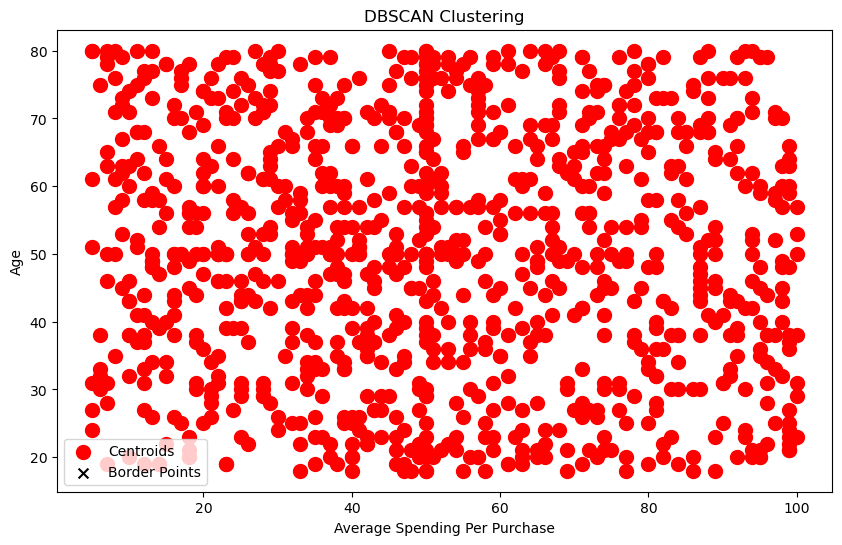

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load the data

# Select numerical columns for clustering
numerical_cols = ['Average_Spending_Per_Purchase', 'Age']
X = df[numerical_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))

# Scatter plot for clusters
scatter = plt.scatter(X['Average_Spending_Per_Purchase'], X['Age'], c=labels, cmap='viridis', s=50, alpha=0.8)

# Plot centroids (core samples)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
core_samples = X[core_samples_mask]
plt.scatter(core_samples['Average_Spending_Per_Purchase'], core_samples['Age'], c='red', marker='o', s=100, label='Centroids')

# Plot border points
border_points = X[labels == -1]
plt.scatter(border_points['Average_Spending_Per_Purchase'], border_points['Age'], c='black', marker='x', s=50, label='Border Points')

plt.title('DBSCAN Clustering')
plt.xlabel('Average Spending Per Purchase')
plt.ylabel('Age')
plt.legend()
plt.show()


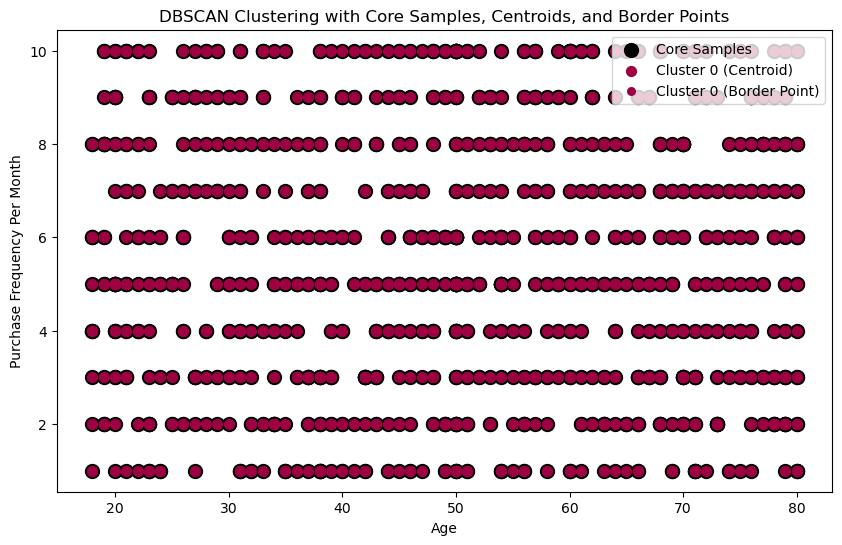

In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the relevant numerical columns
numerical_columns = ['Age', 'Purchase_Frequency_Per_Month']
X = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Plot the data points, centroids, and border points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))

# Plot core samples in black
plt.scatter(X.iloc[core_samples_mask, 0], X.iloc[core_samples_mask, 1], c='k', marker='o', s=100, label='Core Samples')

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], c=[col], marker='o', s=50, label=f'Cluster {k} (Centroid)')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1], c=[col], marker='o', s=30, label=f'Cluster {k} (Border Point)')

plt.title('DBSCAN Clustering with Core Samples, Centroids, and Border Points')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency Per Month')
plt.legend()
plt.show()


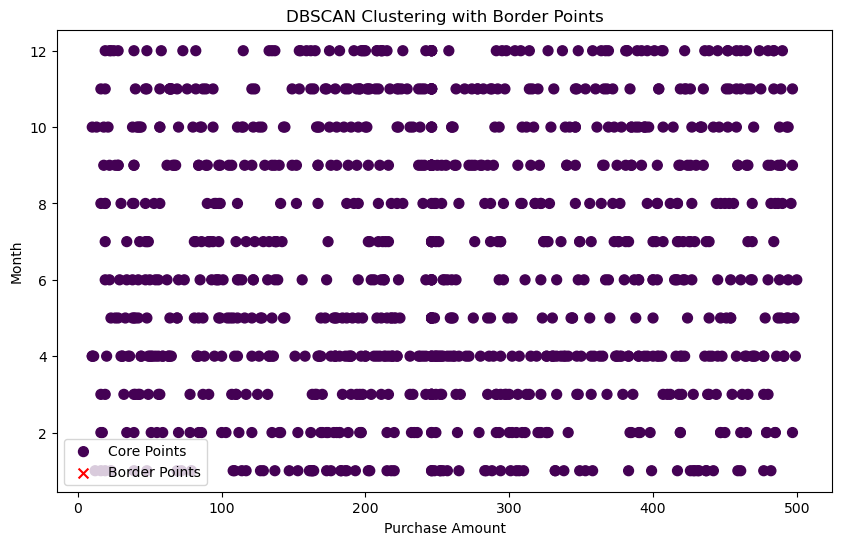

In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Open the data file

# Extract relevant columns
data = df[['Purchase_Amount', 'Month']]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))

# Core points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
plt.scatter(data['Purchase_Amount'][core_samples_mask], data['Month'][core_samples_mask],
            c=labels[core_samples_mask], cmap='viridis', marker='o', s=50, label='Core Points')

# Border points
border_points_mask = (labels == -1) & ~core_samples_mask
plt.scatter(data['Purchase_Amount'][border_points_mask], data['Month'][border_points_mask],
            c='red', marker='x', s=50, label='Border Points')

plt.title('DBSCAN Clustering with Border Points')
plt.xlabel('Purchase Amount')
plt.ylabel('Month')
plt.legend()
plt.show()
